In [6]:
## 获取存储数据文件夹的完整路径
import os
import fnmatch

def find_folders(directory):
    matching_folders = []
    
    # 遍历目录及其子目录
    for root, dirs, files in os.walk(directory):
        for dir_name in dirs:
            # 检查文件夹名称是否以 CXZ 开头，并以 6 位数字结尾
            if dir_name.startswith('CXZ') and dir_name[-6:].isdigit() and len(dir_name[-6:]) == 6:
                matching_folders.append(os.path.join(root, dir_name))
    
    return matching_folders

# 指定要遍历的根目录
root_directory = r'D:\work\CXZ-WN'  # 替换为你的根目录路径

# 获取匹配的文件夹路径
matching_folders = find_folders(root_directory)

# 打印匹配的文件夹路径
for folder in matching_folders:
    print(folder)

print(len(matching_folders))
# 23年7个时间点，24年6个时间点的数据

D:\work\CXZ-WN\CXZ-WN-2023\CXZ-WN-230304
D:\work\CXZ-WN\CXZ-WN-2023\CXZ-WN-230327
D:\work\CXZ-WN\CXZ-WN-2023\CXZ-WN-230414
D:\work\CXZ-WN\CXZ-WN-2023\CXZ-WN-230425
D:\work\CXZ-WN\CXZ-WN-2023\CXZ-WN-230428
D:\work\CXZ-WN\CXZ-WN-2023\CXZ-WN-230502
D:\work\CXZ-WN\CXZ-WN-2023\CXZ-WN-230516
D:\work\CXZ-WN\CXZ-WN-2024\CXZ-WN-240130
D:\work\CXZ-WN\CXZ-WN-2024\CXZ-WN-240417
D:\work\CXZ-WN\CXZ-WN-2024\CXZ-WN-240428
D:\work\CXZ-WN\CXZ-WN-2024\CXZ-WN-240506
D:\work\CXZ-WN\CXZ-WN-2024\CXZ-WN-240513
D:\work\CXZ-WN\CXZ-WN-2024\CXZ-WN-240520
13


In [23]:
## 获取文件夹路径对应的时间timestamps

# 提取最后6个数字
last_six_digits = [path[-6:] for path in matching_folders]
 
# 打印结果
# for digits in last_six_digits:
#     print(digits)
last_six_digits

['230304',
 '230327',
 '230414',
 '230425',
 '230428',
 '230502',
 '230516',
 '240130',
 '240417',
 '240428',
 '240506',
 '240513',
 '240520']

In [25]:
import pandas as pd

# 定义一个函数，用于将数字串转化为时间戳
def convert_to_timestamp(date_num):
    # 提取年份、月份和日期
    year = "20" + date_num[:2]  # 假设年份为21世纪的某一年
    month = date_num[2:4]
    day = date_num[4:]
    # 构建完整的日期字符串，并转化为时间戳
    date_str = f"{year}{month}{day}"
    return date_str
 
# 转化数字串列表为时间戳列表
timestamps = [convert_to_timestamp(date_num) for date_num in last_six_digits]

timestamps

['20230304',
 '20230327',
 '20230414',
 '20230425',
 '20230428',
 '20230502',
 '20230516',
 '20240130',
 '20240417',
 '20240428',
 '20240506',
 '20240513',
 '20240520']

In [8]:
## 将6个数字转化为timestamps
import pandas as pd

# 定义一个函数，用于将数字串转化为时间戳
def convert_to_timestamp(date_num):
    # 提取年份、月份和日期
    year = "20" + date_num[:2]  # 假设年份为21世纪的某一年
    month = date_num[2:4]
    day = date_num[4:]
    # 构建完整的日期字符串，并转化为时间戳
    date_str = f"{year}-{month}-{day}"
    return pd.Timestamp(date_str)
 
# 转化数字串列表为时间戳列表
timestamps = [convert_to_timestamp(date_num) for date_num in last_six_digits]
 
# 打印结果
for timestamp in timestamps:
    print(timestamp)

2023-03-04 00:00:00
2023-03-27 00:00:00
2023-04-14 00:00:00
2023-04-25 00:00:00
2023-04-28 00:00:00
2023-05-02 00:00:00
2023-05-16 00:00:00
2024-01-30 00:00:00
2024-04-17 00:00:00
2024-04-28 00:00:00
2024-05-06 00:00:00
2024-05-13 00:00:00
2024-05-20 00:00:00


In [9]:
## 将时间戳转化为指定频率的时间段
periods = []
for timestamp in timestamps:
    periods.append(timestamp.to_period(freq='D'))

# for period in periods:
#     print(period)
periods

[Period('2023-03-04', 'D'),
 Period('2023-03-27', 'D'),
 Period('2023-04-14', 'D'),
 Period('2023-04-25', 'D'),
 Period('2023-04-28', 'D'),
 Period('2023-05-02', 'D'),
 Period('2023-05-16', 'D'),
 Period('2024-01-30', 'D'),
 Period('2024-04-17', 'D'),
 Period('2024-04-28', 'D'),
 Period('2024-05-06', 'D'),
 Period('2024-05-13', 'D'),
 Period('2024-05-20', 'D')]

In [10]:
## 获取multiband.csv的完整路径
# 遍历路径列表，查找名为 multiband.csv 的文件
l_multiband_file_path = []
for path in matching_folders:
    full_path = os.path.join(path, "multiband.csv")
    if os.path.exists(full_path):
        l_multiband_file_path.append(full_path)
        print(f"找到文件: {full_path}")
        # 如果只需要找到第一个匹配的文件，可以在这里退出循环
        # break
    else:
        print(f"文件不存在于路径: {path}")

print(len(l_multiband_file_path))

找到文件: D:\work\CXZ-WN\CXZ-WN-2023\CXZ-WN-230304\multiband.csv
找到文件: D:\work\CXZ-WN\CXZ-WN-2023\CXZ-WN-230327\multiband.csv
找到文件: D:\work\CXZ-WN\CXZ-WN-2023\CXZ-WN-230414\multiband.csv
找到文件: D:\work\CXZ-WN\CXZ-WN-2023\CXZ-WN-230425\multiband.csv
找到文件: D:\work\CXZ-WN\CXZ-WN-2023\CXZ-WN-230428\multiband.csv
找到文件: D:\work\CXZ-WN\CXZ-WN-2023\CXZ-WN-230502\multiband.csv
找到文件: D:\work\CXZ-WN\CXZ-WN-2023\CXZ-WN-230516\multiband.csv
找到文件: D:\work\CXZ-WN\CXZ-WN-2024\CXZ-WN-240130\multiband.csv
找到文件: D:\work\CXZ-WN\CXZ-WN-2024\CXZ-WN-240417\multiband.csv
找到文件: D:\work\CXZ-WN\CXZ-WN-2024\CXZ-WN-240428\multiband.csv
找到文件: D:\work\CXZ-WN\CXZ-WN-2024\CXZ-WN-240506\multiband.csv
找到文件: D:\work\CXZ-WN\CXZ-WN-2024\CXZ-WN-240513\multiband.csv
找到文件: D:\work\CXZ-WN\CXZ-WN-2024\CXZ-WN-240520\multiband.csv
13


In [11]:
## 读取单年的单个band的时间序列数据
multiband = ['Blue','Green','NIR','Red','RedEdge']
# 初始化一个包含5个空列表的列表
l_df_band_2023 = [[] for _ in range(5)]
l_df_band_2024 = [[] for _ in range(5)]

for i in range(len(l_multiband_file_path)):
    path = l_multiband_file_path[i]
    df = pd.read_csv(path)
    if 'WN-23' in path:
        for b,band in enumerate(multiband):
            df_band = df[band]
            l_df_band_2023[b].append(df_band)
    elif 'WN-24' in path:
        for b,band in enumerate(multiband):
            df_band = df[band]
            l_df_band_2024[b].append(df_band)
    else:
        print('有一个奇怪的地址被输入了')

for num_band in range(len(multiband)):

    df_band_2023 = pd.concat(l_df_band_2023[num_band], axis=1)
    df_band_2024 = pd.concat(l_df_band_2024[num_band], axis=1)

    periods_2023 = []
    periods_2024 = []
    for period in periods:
        if period.year == 2023:
            periods_2023.append(period)
        elif period.year == 2024:
            periods_2024.append(period)

    df_band_2023.columns = periods_2023
    output_path_2023 = rf'D:\work\CXZ-WN\CXZ-WN-2023\{multiband[num_band]}.csv'
    df_band_2023.to_csv(output_path_2023,index=False)

    df_band_2024.columns = periods_2024
    output_path_2024 = rf'D:\work\CXZ-WN\CXZ-WN-2024\{multiband[num_band]}.csv'
    df_band_2024.to_csv(output_path_2024,index=False)

In [13]:
# 定义颜色列表
color_band = [
    'blue',          # 'Blue' 对应 Matplotlib 的 'blue'
    'green',         # 'Green' 对应 Matplotlib 的 'green'
    '#800000',       # 'NIR' (近红外) 可以选择一个接近深红色的颜色，这里使用了一个RGB值
    'red',           # 'Red' 对应 Matplotlib 的 'red'
    '#7030A0'        # 'RedEdge' (红边) 可以选择一个介于红色和紫色之间的颜色，这里同样使用了一个RGB值
]

In [14]:
## 将数据可视化
import matplotlib.pyplot as plt
import matplotlib

def draw_plot_multiband(year):
    # 设置Matplotlib的字体为支持中文的字体，例如SimHei（黑体）
    matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
    matplotlib.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题

    fig, axs = plt.subplots(nrows=len(multiband), ncols=1, figsize=(10, 6))  # 创建一个5行1列的子图布局

    # 设置总的标题
    fig.suptitle(f'{year}年某个小区多光谱波段的变化情况', fontsize=16, y=0.95)  # y参数调整标题与图像顶部的距离

    for i,band in enumerate(multiband):
        band_file_path = rf'D:\work\CXZ-WN\CXZ-WN-{year}\{band}.csv'
        df_band = pd.read_csv(band_file_path)
        axs[i].plot(df_band.iloc[0], label = band , color = color_band[i])
        axs[i].legend()
        # 去掉边框
        # axs[i].spines['top'].set_visible(False)
        # axs[i].spines['right'].set_visible(False)
        # axs[i].spines['left'].set_visible(False)  # 如果需要左边框也去掉，就保留这行代码；否则可以注释掉或设置为True
        # axs[i].spines['bottom'].set_visible(False)
        # 如果你想去掉所有边框，但保留刻度线和标签，可以使用以下代码代替上面的四行代码：
        for spine in axs[i].spines.values():
            spine.set_visible(False)
        # 添加网格线
        axs[i].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
        if i != len(multiband)-1:
            axs[i].xaxis.set_tick_params(labelbottom=False)  # 隐藏x轴标签

    # 调整子图之间的间距和边缘，以避免重叠并适应去掉边框后的布局
    plt.subplots_adjust(wspace=0.3, hspace=0.3, top=0.9, bottom=0.1, left=0.1, right=0.9)
    # wspace和hspace控制子图之间的水平和垂直间距
    # top, bottom, left, right控制图像边缘与子图之间的间距

    plt.tight_layout()  # 调整子图之间的间距以避免重叠
    plt.show()

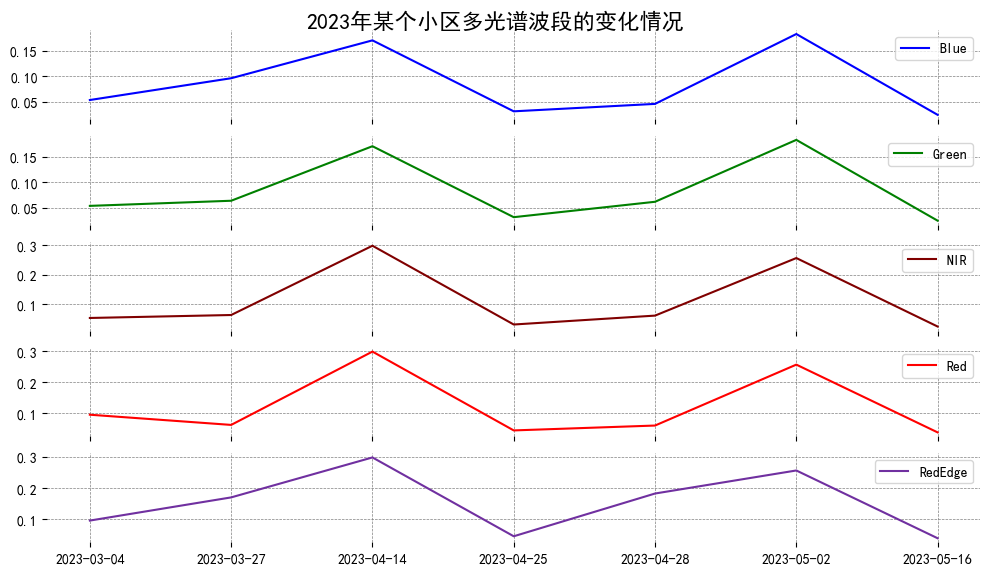

In [15]:
draw_plot_multiband('2023')

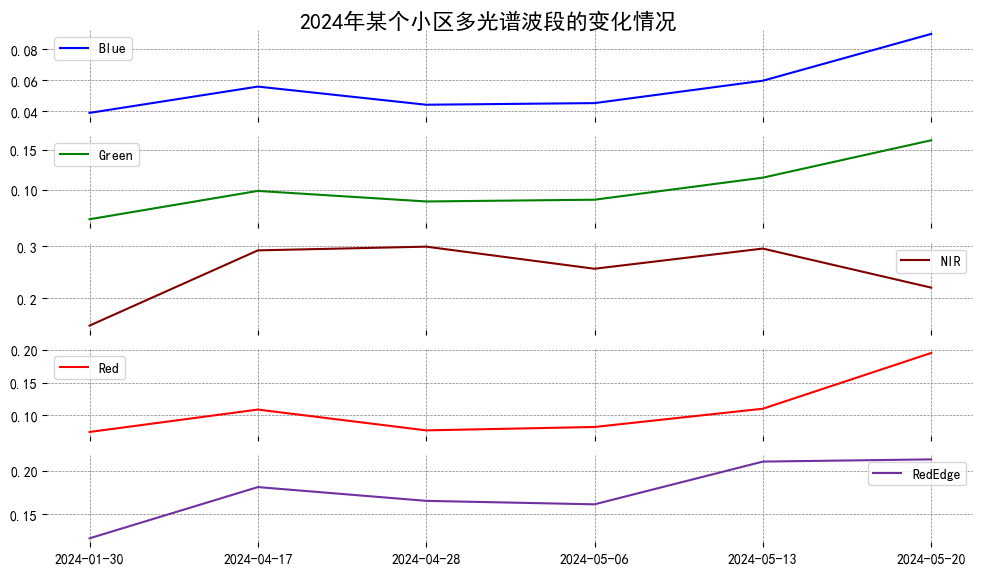

In [16]:
draw_plot_multiband('2024')

In [17]:
## 将时间轴拉到正常
import numpy as np

def get_freqD_timestamp(t_periods):
    df_freq_d = pd.date_range(start=t_periods[0].to_timestamp(freq='D'), end=t_periods[-1].to_timestamp(freq='D'))
    total_d = len(df_freq_d)
    print(f'经历了{total_d}天')
    return df_freq_d

def get_df_freq_d(t_periods,year,band):
    l_freq_d = get_freqD_timestamp(t_periods)
    # 创建一个与列标签数量相匹配的全NaN列表，用于第一行的数据
    first_row = [np.nan] * len(l_freq_d)
    # 创建一个DataFrame，列标签为columns_list，第一行为first_row
    # 注意：我们没有明确指定index，所以Pandas会自动分配默认的整数索引
    df_freq_d = pd.DataFrame([first_row], columns=l_freq_d)

    ## 把数据填入
    # year = '2023'
    # band = 'Blue'
    band_file_path = rf'D:\work\CXZ-WN\CXZ-WN-{year}\{band}.csv'
    df_band = pd.read_csv(band_file_path)

    # 选择要遍历的行
    row_index = 0
    
    # 遍历该行的列名和值
    for column_name, value in df_band.iloc[row_index].items():
        # print(f"列名: {column_name}, 值: {value}")
        # df_freq_d[column_name] = value
        df_freq_d[column_name] = 1

    return df_freq_d

经历了74天


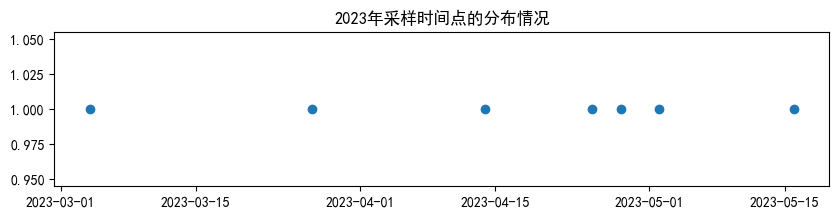

In [21]:
t_periods = periods_2023
year = '2023'
band = 'blue'
df_freq_d = get_df_freq_d(t_periods,year,band)

def draw_scatter_time(df_freq_d,year):
    ## 将正常时间轴的数据可视化
    plt.figure(figsize=(10, 2))
    plt.scatter(df_freq_d.columns,df_freq_d.iloc[0])
    # plt.title('2023年标准时间轴某小区某band的变化')
    plt.title(f'{year}年采样时间点的分布情况')
    plt.show()

draw_scatter_time(df_freq_d,year)

In [22]:
t_periods

[Period('2023-03-04', 'D'),
 Period('2023-03-27', 'D'),
 Period('2023-04-14', 'D'),
 Period('2023-04-25', 'D'),
 Period('2023-04-28', 'D'),
 Period('2023-05-02', 'D'),
 Period('2023-05-16', 'D')]

经历了112天


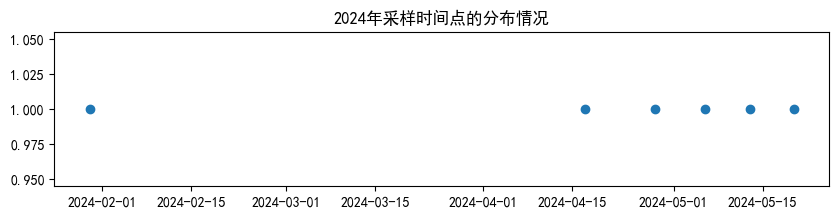

In [19]:
t_periods = periods_2024
year = '2024'
band = 'blue'
df_freq_d = get_df_freq_d(t_periods,year,band)
draw_scatter_time(df_freq_d,year)

In [20]:
t_periods

[Period('2024-01-30', 'D'),
 Period('2024-04-17', 'D'),
 Period('2024-04-28', 'D'),
 Period('2024-05-06', 'D'),
 Period('2024-05-13', 'D'),
 Period('2024-05-20', 'D')]